# Задача 1. Разведочный анализ
## Группа 23.М08-мм, Годзун Егор
## Задачи:

- ✅ Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте [kaggle](https://www.kaggle.com), [UCI](https://archive.ics.uci.edu/ml/datasets.php) репозитория, [Google Dataset Search](https://datasetsearch.research.google.com/) и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.
- ✅ Считать данные и вывести их основные характеристики, описание признаков.
- ✅ Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.
- ✅ * (+2 балла) Произвести чистку данных (**Data Cleaning**). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.
- ✅ Провести анализ признаков, используя визуализацию (**hist(), boxplot(), countplot(), barplot()** и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.
- ✅ * (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).
- ✅ * (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (**Feature Engineering**).

Ссылка на рассматриваемый [датасет](https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression).

Описание датасета:
- **male** ––– пол, мужской (`1`) или женский (`0`);
- **age** ––– возраст пациента (все возраста были округлены до целых чисел);
- **education** ––– отсутствует в описании датасета;
- **currentSmoker** ––– является ли пациент текущим курильщиком;
- **cigsPerDay** ––– количество сигарет, выкуриваемых человеком в среднем за один день;
- **BPMeds** ––– принимал ли пациент лекарства от артериального давления
- **prevalentStroke**	–––	перенес ли пациент ранее инсульт
- **prevalentHyp** ––– является ли пациент гипертоником или нет
- **diabetes** ––– есть ли у пациента диабет
- **totChol** ––– уровень общего холестерина
- **sysBP** ––– систолическое артериальное давление (артериальное давление в момент максимального сокращения сердца)
- **diaBP** ––– диастолическое артериальное давление (артериальное давление в момент максимального расслабления сердца)
- **BMI** ––– Индекс Массы Тела
- **heartRate** ––– частота сердечных сокращений
- **glucose** ––– уровень глюкозы
- **TenYearCHD** (целевой признак) ––– 10-летний риск развития ишемической болезни сердца (ИБС) (двоичный код: `1` означает "Да", `0` означает "Нет").

Набор данных основан на продолжающемся исследовании сердечно-сосудистой системы у жителей города Фрамингем, штат Массачусетс. Цель исследования — предсказать, есть ли у пациента 10-летний риск развития ишемической болезни сердца (ИБС) в будущем.

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [230]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Проверяем, что в наших данных отсутствуют дубликаты

In [231]:
df.duplicated().sum()

0

Переименуем признаки

In [232]:
df.rename(columns={'male':'Sex',
                   'age':'Age',
                   'BPMeds':'BP_Meds',
                   'education':'Education',
                   'currentSmoker':'Current_Smoker',
                   'cigsPerDay':'Cigs_Per_Day',
                   'prevalentStroke':'Prevalent_Stroke',
                   'prevalentHyp':'Prevalent_Hyp',
                   'diabetes':'Diabetes',
                   'totChol':'Total_Chol',
                   'sysBP':'Systolic_BP',
                   'diaBP':'Diastolic_BP',
                   'heartRate':'Heart_Rate',
                   'glucose':'Glucose_level',
                   'TenYearCHD':'Ten_Year_CHD'},inplace=True)

In [233]:
df.shape

(4238, 16)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               4238 non-null   int64  
 1   Age               4238 non-null   int64  
 2   Education         4133 non-null   float64
 3   Current_Smoker    4238 non-null   int64  
 4   Cigs_Per_Day      4209 non-null   float64
 5   BP_Meds           4185 non-null   float64
 6   Prevalent_Stroke  4238 non-null   int64  
 7   Prevalent_Hyp     4238 non-null   int64  
 8   Diabetes          4238 non-null   int64  
 9   Total_Chol        4188 non-null   float64
 10  Systolic_BP       4238 non-null   float64
 11  Diastolic_BP      4238 non-null   float64
 12  BMI               4219 non-null   float64
 13  Heart_Rate        4237 non-null   float64
 14  Glucose_level     3850 non-null   float64
 15  Ten_Year_CHD      4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.

Все признаки имеют тип или `int64`, или `float64`

In [235]:
df.isnull().sum()

Sex                   0
Age                   0
Education           105
Current_Smoker        0
Cigs_Per_Day         29
BP_Meds              53
Prevalent_Stroke      0
Prevalent_Hyp         0
Diabetes              0
Total_Chol           50
Systolic_BP           0
Diastolic_BP          0
BMI                  19
Heart_Rate            1
Glucose_level       388
Ten_Year_CHD          0
dtype: int64

Видим, что больше всего пропущенных значений имеет признак `Glucose_level` -- 388, потом `Education` -- 105, `BP_Meds` -- 53, `Total_Chol` -- 50, `Cigs_Per_Day` -- 29, `BMI` -- 19, `Heart_Rate` -- 1

Проверим действительно ли признак `Ten_Year_CHD` содержит значения только `1` и `0`

In [236]:
df['Ten_Year_CHD'].value_counts()

Ten_Year_CHD
0    3594
1     644
Name: count, dtype: int64

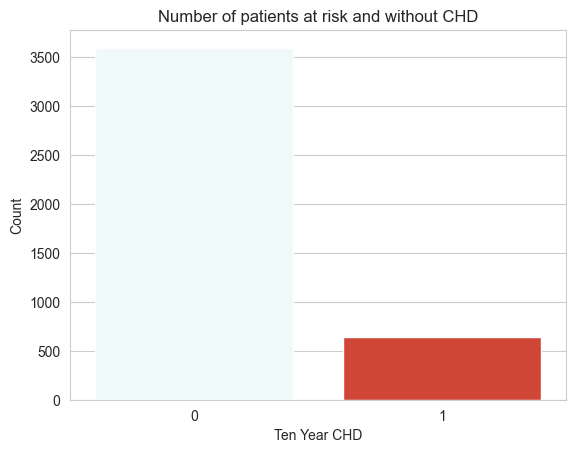

In [237]:
ax = sns.countplot(x='Ten_Year_CHD', data=df, palette=sns.color_palette(['#edfafc','#e8321e']))
ax.set_title('Number of patients at risk and without CHD')
ax.set_xlabel('Ten Year CHD')
ax.set_ylabel('Count')
None

In [238]:
df['Ten_Year_CHD'].mean()

0.1519584709768759

Из наших данных следует, что только около 15% пациентов имеют риск развития ишемической болезни сердца

## Первичный анализ признаков

### Категориальный признак Sex

In [239]:
df_female_and_male = df.replace({'Sex': {1: 'male', 0: 'female'}})
df_female_and_male.groupby(['Sex', 'Ten_Year_CHD'])['Ten_Year_CHD'].count()

Sex     Ten_Year_CHD
female  0               2118
        1                301
male    0               1476
        1                343
Name: Ten_Year_CHD, dtype: int64

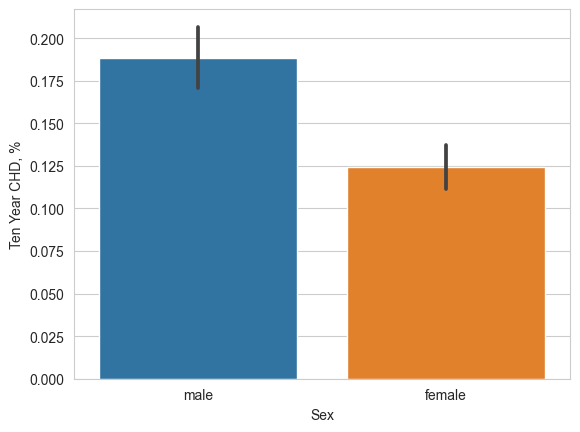

In [240]:
ax = sns.barplot(x = "Sex", y = "Ten_Year_CHD", data = df_female_and_male)
ax.set_xlabel('Sex')
ax.set_ylabel('Ten Year CHD, %')
None

Риску подвержены около 19% мужчин и около 12% женщин

Даже несмотря на то, что количество женщин превышает количество мужчин, число пациент-мужчин подверженных риску выше

### Количественный признак Age

In [241]:
df['Age'].describe()

count    4238.000000
mean       49.584946
std         8.572160
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: Age, dtype: float64

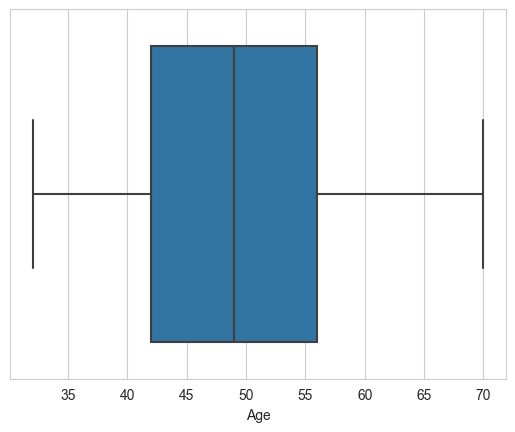

In [242]:
sns.boxplot(x='Age', data=df)
None

Из графика видим, что выбросы отсутствуют

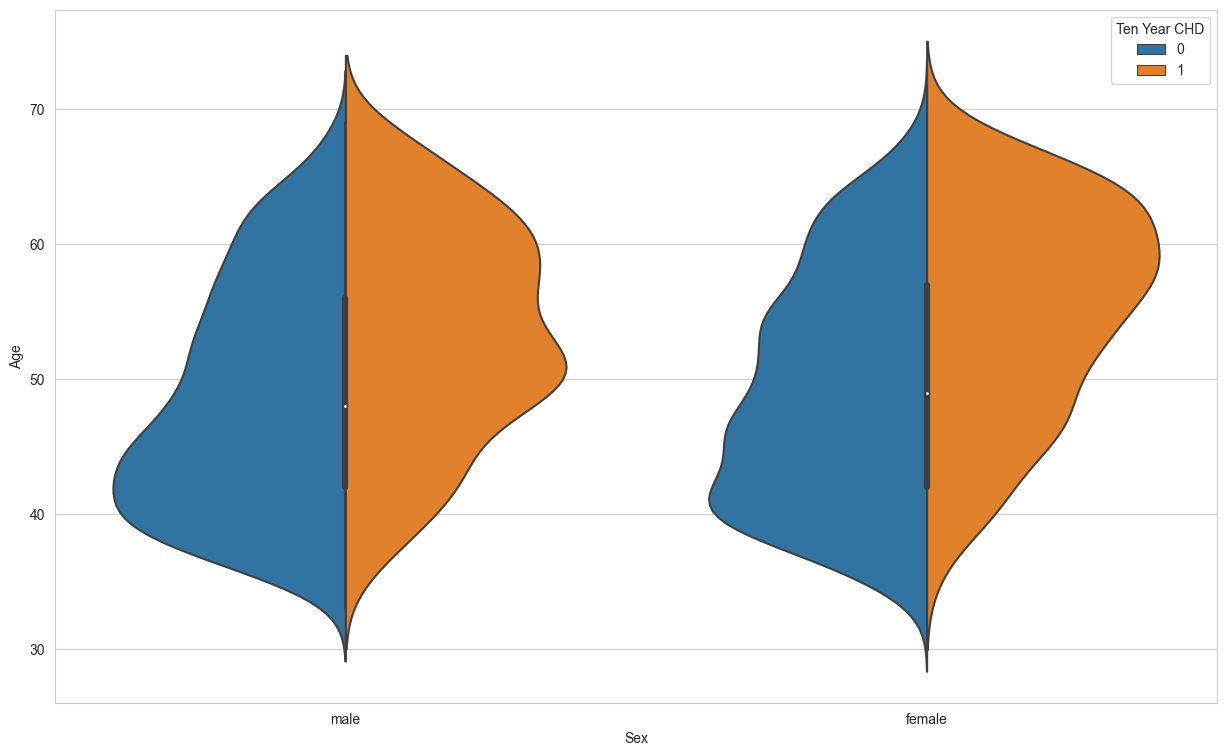

In [243]:
plt.figure(figsize=(15, 9))
sns.violinplot(x="Sex", y="Age", hue="Ten_Year_CHD", data=df_female_and_male, split=True)
plt.legend(title='Ten Year CHD')
None

Мужчины:
- больше всего подвержены риску в возрасте от 45 до 65

Женщины:
- больше всего подвержены риску в возрасте от 50 до 65

In [244]:
df_female_and_male.groupby(['Sex','Ten_Year_CHD']).agg({'Age': ['max', 'min', 'mean']}).round(2)

Age           
                    max min   mean
Sex    Ten_Year_CHD               
female 0             70  32  49.05
       1             70  35  55.09
male   0             69  33  48.37
       1             69  35  53.31

Видим, что для женщин риск наступает позже, чем для мужчин

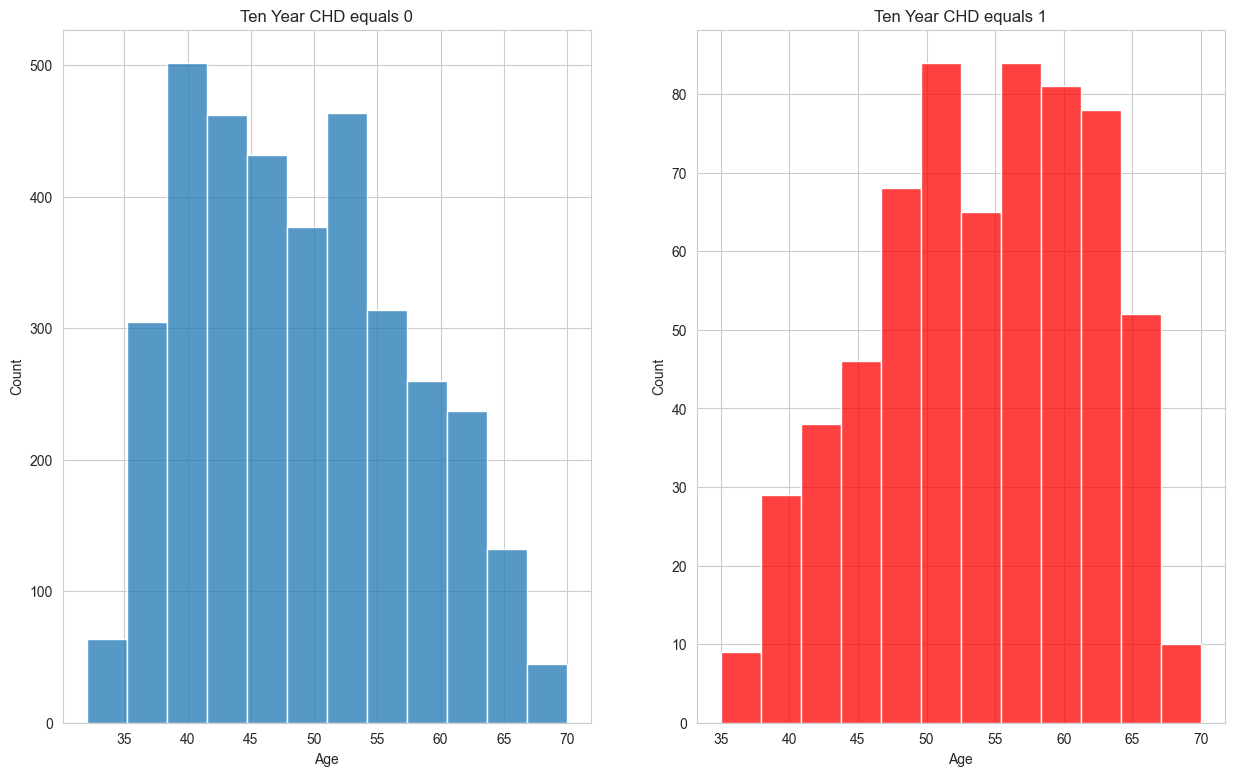

In [245]:
_, ax = plt.subplots(1, 2, figsize=(15, 9))
ax1 = sns.histplot(x='Age', data=df_female_and_male[df['Ten_Year_CHD']==0], ax=ax[0], bins=12)
ax1.set_title('Ten Year CHD equals 0')
ax2 = sns.histplot(x='Age', data=df_female_and_male[df['Ten_Year_CHD']==1], ax=ax[1], bins=12, color='red')
ax2.set_title('Ten Year CHD equals 1')
None

### Порядковый признак Education

Так как отсутствует описание этого признака, удалим его

In [246]:
df.drop(columns='Education', axis=1, inplace=True)
df_female_and_male.drop(columns='Education', axis=1, inplace=True)

### Категориальный признак Current_Smoker

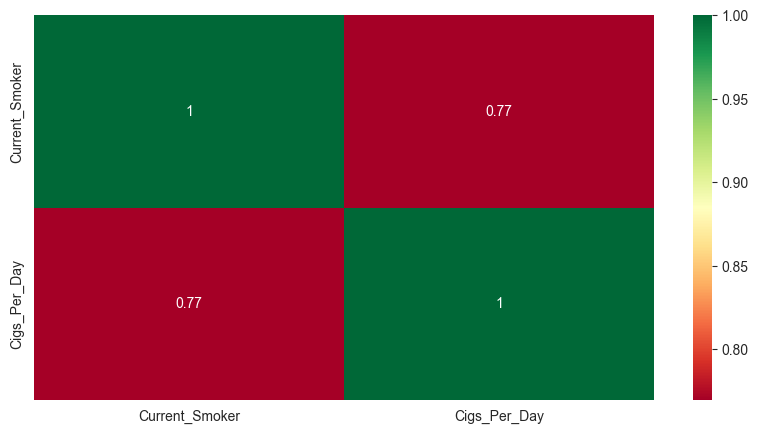

In [247]:
sns.heatmap(df[['Current_Smoker','Cigs_Per_Day']].corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [248]:
df[df['Cigs_Per_Day'].isnull()]['Current_Smoker'].value_counts()

Current_Smoker
1    29
Name: count, dtype: int64

Определяем, что значения пропущены только для курящих пациентов

In [249]:
categories = pd.qcut(df['Age'], q=5)
category_codes, _ = pd.factorize(categories, sort=True)
df['Age_Category'] = category_codes + 1
df_female_and_male['Age_Category'] = category_codes + 1

Добавили признак `Age_Category` (5 интервалов возрастов)

In [250]:
def fill_empty_values(name_column):
    # сначала среди мужчин и женщин по каждой возрастной категории определяем среднее количество выкуриваемых сигарет в день
    ser = df.replace({'Sex': {1: 'male', 0: 'female'}}).groupby(['Sex', 'Age_Category'])[name_column].mean().round()

    # заполняем пропущенные значения
    for sex in ['male', 'female']:
        for age_category in range(1,6):
            mask = (df_female_and_male[name_column].isnull()) & (df_female_and_male['Sex'] == sex) & (df_female_and_male['Age_Category'] == age_category)
            df.loc[mask, name_column] = ser[sex, age_category]

fill_empty_values('Cigs_Per_Day')
df['Cigs_Per_Day'].isnull().any()

False

### Количественный признак Cigs_Per_Day

In [251]:
df['Cigs_Per_Day'].describe()

count    4238.000000
mean        9.007551
std        11.885912
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: Cigs_Per_Day, dtype: float64

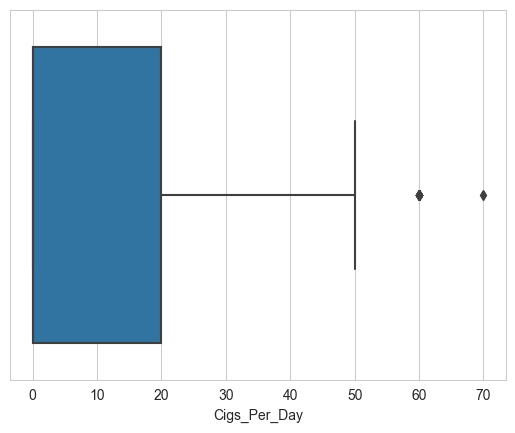

In [252]:
sns.boxplot(x='Cigs_Per_Day', data=df)
None

In [253]:
df.replace({'Sex': {1: 'male', 0: 'female'}}).groupby(['Sex','Ten_Year_CHD','Current_Smoker']).agg({'Cigs_Per_Day': ['mean','count']}).round(2)

Cigs_Per_Day      
                                           mean count
Sex    Ten_Year_CHD Current_Smoker                   
female 0            0                      0.00  1239
                    1                     13.79   879
       1            0                      0.00   192
                    1                     15.67   109
male   0            0                      0.00   594
                    1                     21.78   882
       1            0                      0.00   119
                    1                     22.93   224

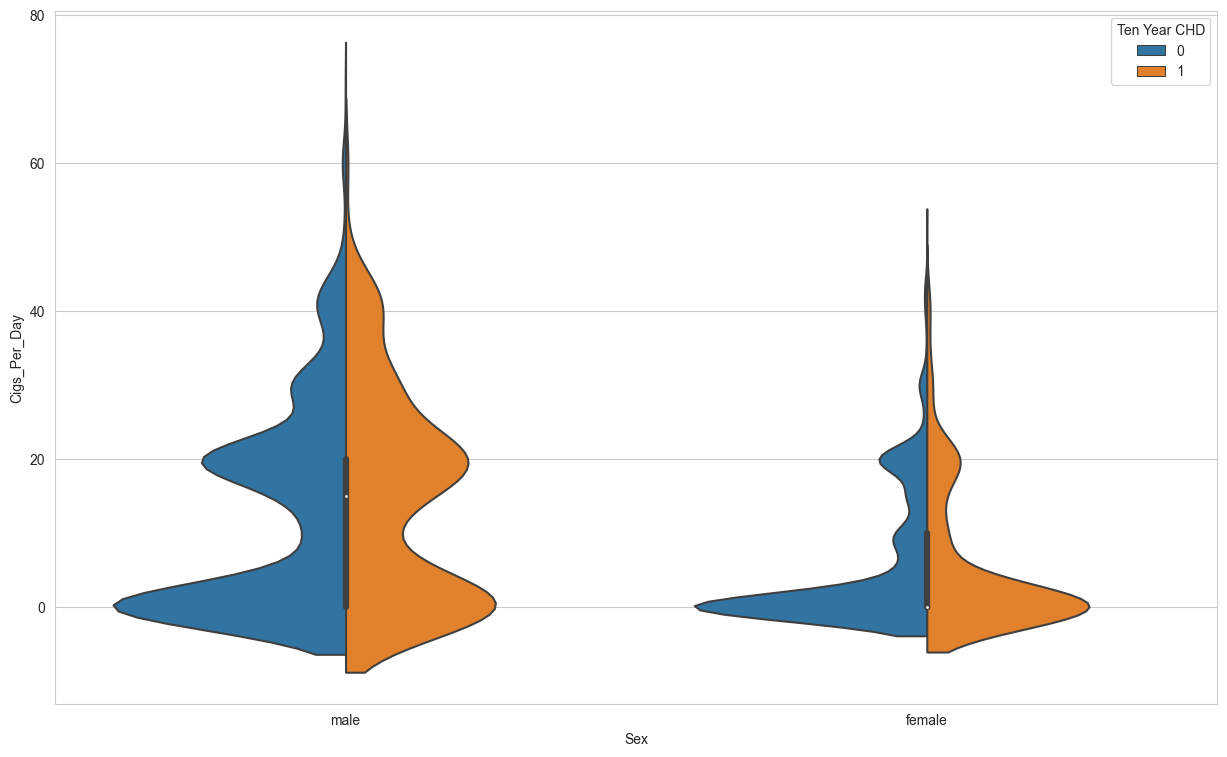

In [254]:
plt.figure(figsize=(15, 9))
sns.violinplot(x="Sex", y="Cigs_Per_Day", hue="Ten_Year_CHD", data=df.replace({'Sex': {1: 'male', 0: 'female'}}), split=True)
plt.legend(title='Ten Year CHD')
None

- Видимо количество выкуриваемых сигарет прямо не влияет на `Ten_Year_CHD`
- В целом курят примерно 41% женщин и 61% мужчин

### Категориальные признаки BPMeds, prevalentStroke, prevalentHyp, diabetes

Как мы помним, в признаке `BP_Meds` 53 пропущенных значения, заменим их самым популярным, так как это очень небольшой процент от общего числа пациентов

In [255]:
df['BP_Meds'].value_counts()

BP_Meds
0.0    4061
1.0     124
Name: count, dtype: int64

In [256]:
df.loc[df['BP_Meds'].isnull(), 'BP_Meds'] = 0
df['BP_Meds'].isnull().any()

False

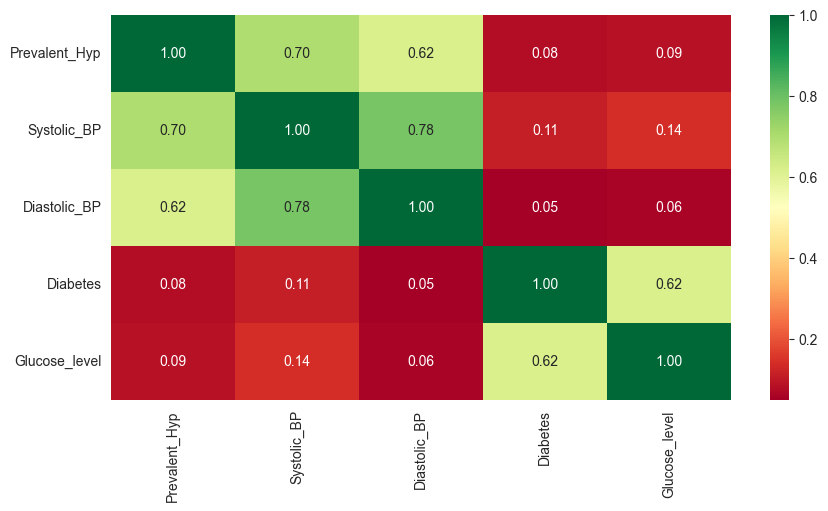

In [257]:
sns.heatmap(df[['Prevalent_Hyp','Systolic_BP','Diastolic_BP','Diabetes','Glucose_level']].corr(), annot=True, cmap='RdYlGn', fmt='.2f')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

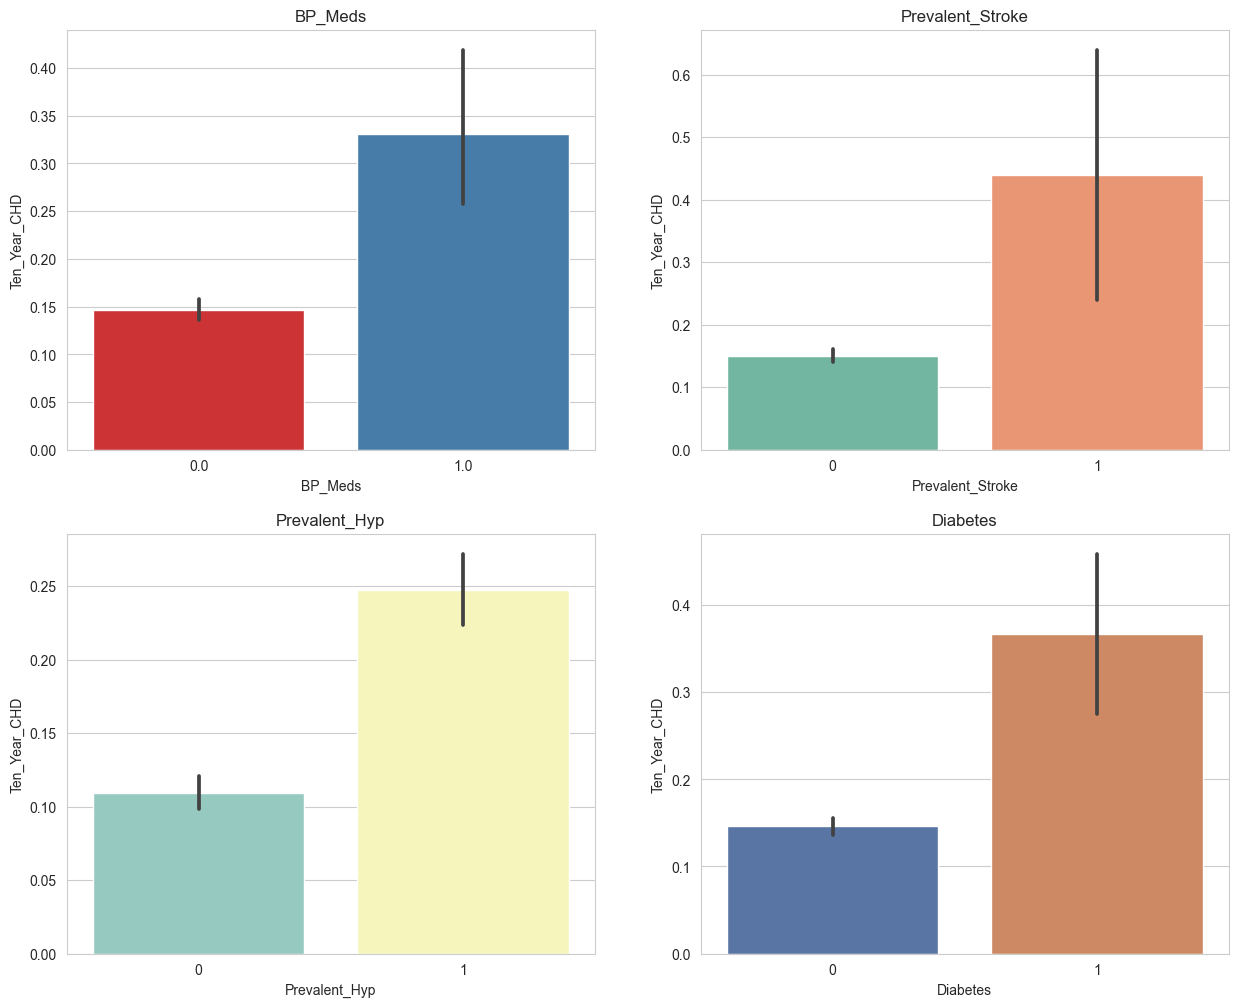

In [258]:
_, ax = plt.subplots(2, 2, figsize=(15,12))
sns.barplot(x = "BP_Meds", y = "Ten_Year_CHD", data = df, ax=ax[0,0], palette='Set1')
ax[0,0].set_title('BP_Meds')
sns.barplot(x = "Prevalent_Stroke", y = "Ten_Year_CHD", data = df, ax=ax[0,1], palette='Set2')
ax[0,1].set_title('Prevalent_Stroke')
sns.barplot(x = "Prevalent_Hyp", y = "Ten_Year_CHD", data = df, ax=ax[1,0], palette='Set3')
ax[1,0].set_title('Prevalent_Hyp')
sns.barplot(x = "Diabetes", y = "Ten_Year_CHD", data = df, ax=ax[1,1], palette='deep')
ax[1,1].set_title('Diabetes')
plt.show()

- Высокий процент риска у пациентов, которые перенесли инсульт и у диабетиков
- Признак `Prevalent_Hyp` сильно коррелирует с признаками `Systolic_BP` и `Diastolic_BP`, а признак `Diabetes` - с `Glucose_level`

### Количественные признаки totChol, sysBP, diaBP, BMI, heartRate, glucose

Пропущенные значения признаков `Total_Chol`, `BMI`, `Heart_Rate`, `Glucose_level` заполним аналогично `Cigs_Per_Day`

In [259]:
array_columns_name = ['Total_Chol','BMI','Heart_Rate','Glucose_level']
for name in array_columns_name:
    fill_empty_values(name)
    print(df[name].isnull().any())

False
False
False
False


In [260]:
df[df['Total_Chol']>240]['Total_Chol'].count()

1827

У около 43% пациентов повышенный холестерин

Так как признаки `Systolic_BP` и `Distolic_BP` сильно коррелируют между собой, заменим их признаком `Pulse_Pressure` (разницой между `Systolic_BP` и `Distolic_BP`)

In [261]:
Pulse_Pressure = df['Systolic_BP']-df['Diastolic_BP']
Pulse_Pressure[Pulse_Pressure<0].count()

0

In [262]:
df['Pulse_Pressure'] = Pulse_Pressure

In [263]:
df[['Total_Chol','Systolic_BP','Diastolic_BP', 'BMI', 'Heart_Rate', 'Glucose_level', 'Pulse_Pressure']].describe()

,Total_Chol,Systolic_BP,Diastolic_BP,BMI,Heart_Rate,Glucose_level,Pulse_Pressure
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,236.768523,132.352407,82.893464,25.801008,75.878244,81.955403,49.458943
std,44.377625,22.038097,11.910850,4.071578,12.025258,22.853396,14.695468
min,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,15.000000
25%,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,40.000000
50%,234.000000,128.000000,82.000000,25.400000,75.000000,79.000000,47.000000
75%,262.000000,144.000000,89.875000,28.037500,83.000000,86.000000,56.000000
max,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,160.000000


В принципе для всех признаков средние значения находятся в пределах допустимого (по медицинским показателям)

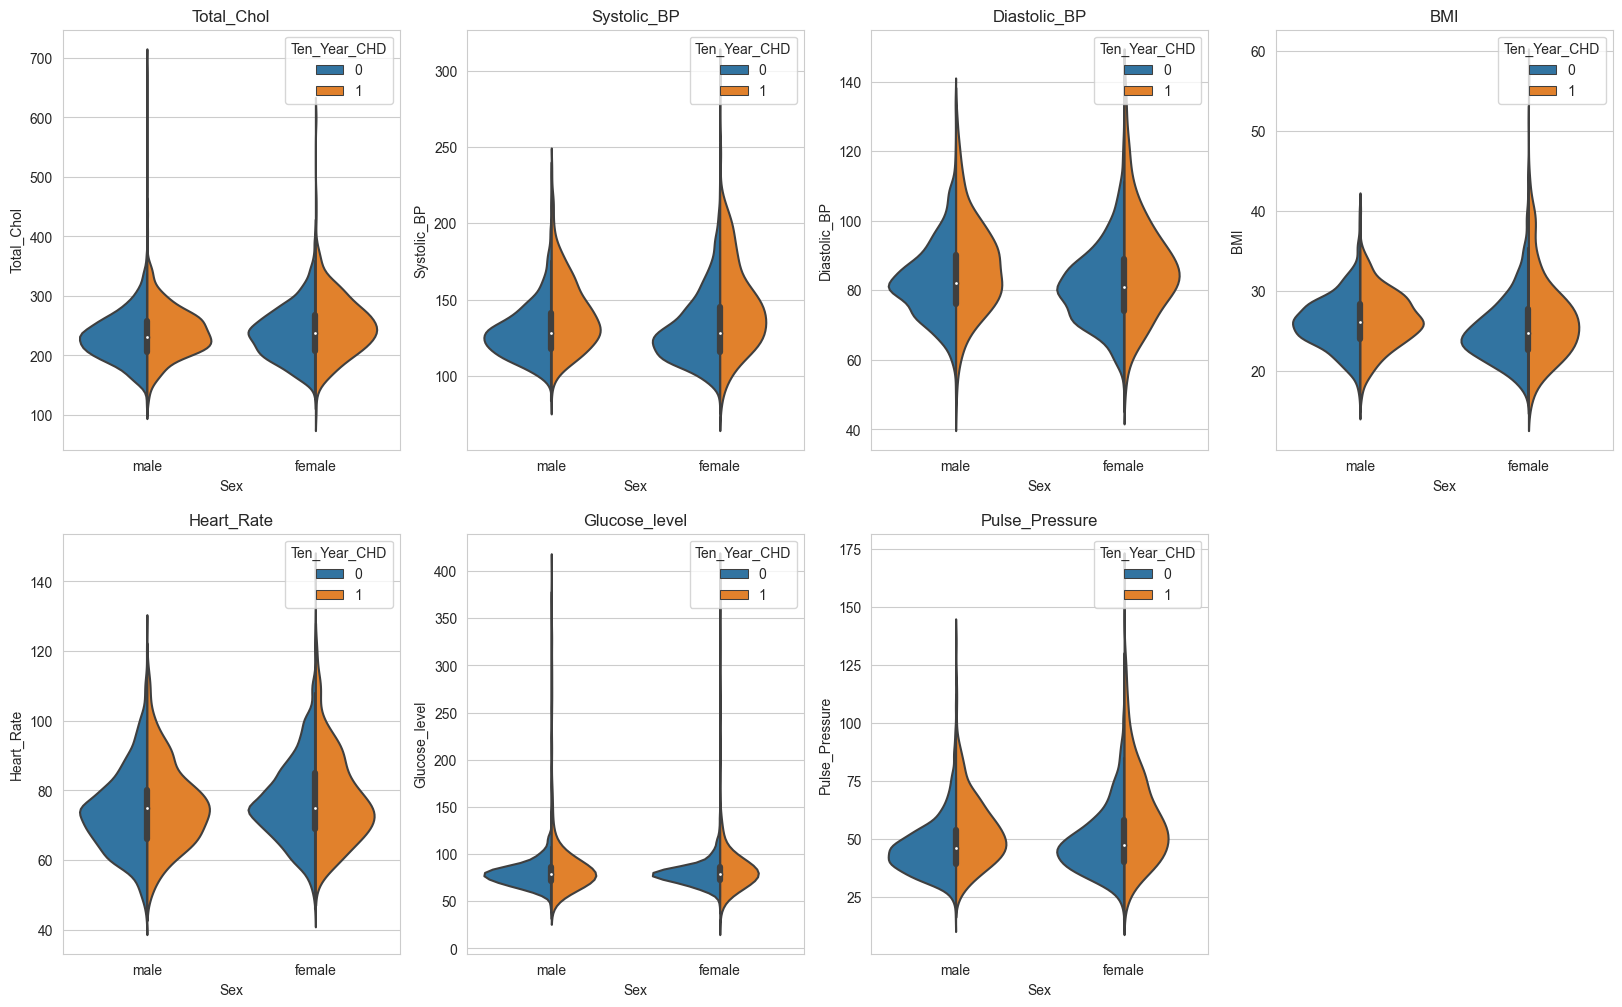

In [264]:
array_columns_name = ['Total_Chol','Systolic_BP','Diastolic_BP', 'BMI', 'Heart_Rate', 'Glucose_level', 'Pulse_Pressure']

_, ax = plt.subplots(2, 4, figsize=(20, 12))

raw = 0
column = 0
for name in array_columns_name:
    if column==4:
        raw=1
        column=0
    sns.violinplot(x="Sex", y=name, hue="Ten_Year_CHD", data=df.replace({'Sex': {1: 'male', 0: 'female'}}), split=True, ax=ax[raw,column])
    ax[raw, column].set_title(name)
    column+=1

ax[1, 3].remove()
plt.show()

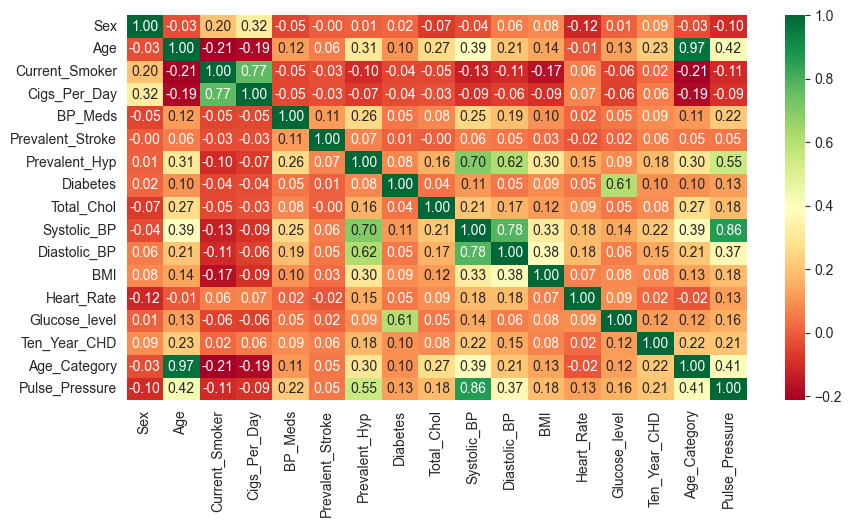

In [265]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', fmt='.2f')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

- У некоторого процента пациентов показатели `Total_Chol`,`Systolic_BP`, `BMI`, `Glucose_level`, `Pulse_Pressure` завышены
- По `Glucose_level` большая часть женщины ближе к норме, чем мужчины, та же картина с `Pulse_Pressure`, `BMI`
- Видим влияние `Systolic_BP`, `Diastolic_BP` и `Pulse_Pressure` на `Ten_Year_CHD`

### Категориальный признак Age_Category

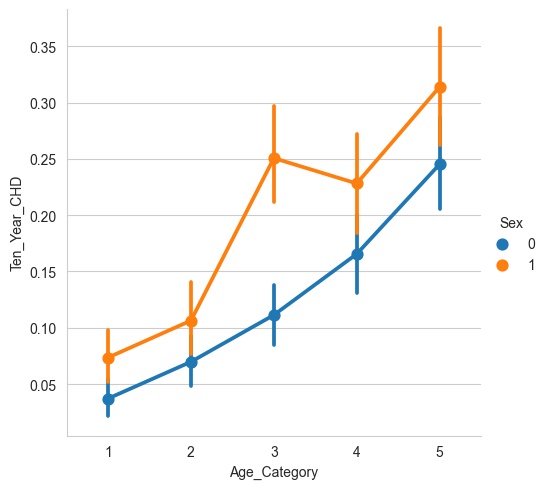

In [266]:
sns.catplot(x='Age_Category', y='Ten_Year_CHD',hue='Sex' , data=df, kind='point')
None

При любой возрастной категории мужчины больше подвержены риску, чем женщины

### Удаление признаков
**Education** –– уже удалили.

**Age** –– вместо него будем использовать категории возрастов **Age_Category**.

**Current_Smoker** –– **Cigs_Per_Day** волне достаточно.

**Systolic_BP** и **Diastolic_BP** –– вместо них **Pulse_Pressure**

In [267]:
df.drop(columns=['Age', 'Current_Smoker', 'Systolic_BP', 'Diastolic_BP'], axis=1, inplace=True)

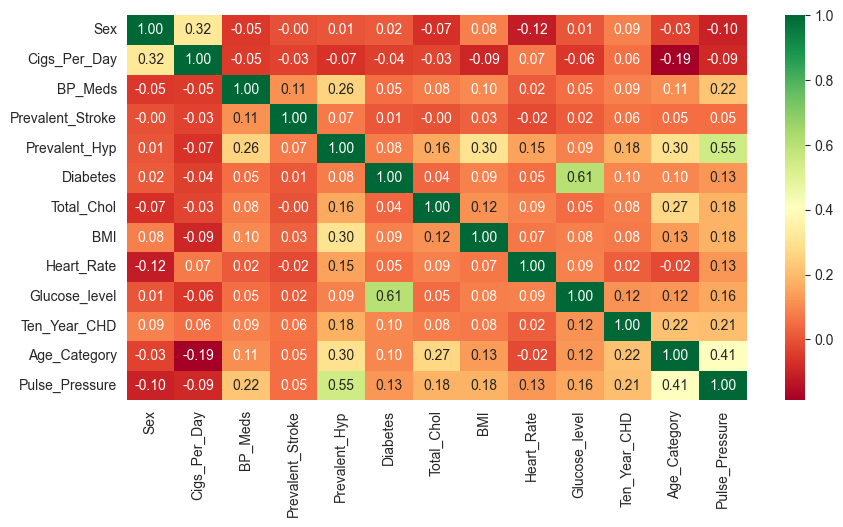

In [268]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', fmt='.2f')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()